<a href="https://colab.research.google.com/github/Yashwardhankaul/central_limit_theorem/blob/master/Analyzing_distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Lit homework Assignment week 2

## PART 1
1. Follow the “Histograms and Density Plots in Python” tutorial to figure out which airline is most likely to get you to your destination on time.
2. Download the data file (formatted_flights.csv) [here](https://github.com/WillKoehrsen/Data-Analysis/tree/master/univariate_dist/data)
3. Tell us which airline you choose and why.

In [0]:
#Importing Google Drive to access Dataset
from google.colab import drive
drive.mount('/content/drive')

In [2]:
#Checking if the files are available
!ls "drive/My Drive/formatted_flights.csv"

ls: cannot access 'drive/My Drive/formatted_flights.csv': No such file or directory


In [0]:
#Importing dependencies 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [5]:
# Read in data and examine first 10 rows
flights = pd.read_csv('drive/My Drive/formatted_flights.csv')
flights.head()

,Unnamed: 0,arr_delay,name
0,0,11.0,United Air Lines Inc.
1,1,20.0,United Air Lines Inc.
2,2,33.0,American Airlines Inc.
3,3,-18.0,JetBlue Airways
4,4,-25.0,Delta Air Lines Inc.


In [6]:
# checkning for missing values
flights.isnull().values.any()

False

In [7]:
# let's take a statistical look at the arr_delay feature
flights.arr_delay.describe()

count    317113.000000
mean          1.297143
std          29.064401
min         -60.000000
25%         -17.000000
50%          -6.000000
75%          11.000000
max         120.000000
Name: arr_delay, dtype: float64

According to the post on Towards Data Science [link](https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0), the flight arrival delays are in minutes and negative values mean the flight was early.
In this dataframe we have arrival delayes of 317,113 flights with the minimum delay of -60 i.e. the filght being 60 mins early, and the maximum delay is a delay of 120 mins or 2 hours.

In [11]:
# What are the names of the different airlines
flights.name.unique()

array(['United Air Lines Inc.', 'American Airlines Inc.',
       'JetBlue Airways', 'Delta Air Lines Inc.',
       'ExpressJet Airlines Inc.', 'Envoy Air', 'US Airways Inc.',
       'Southwest Airlines Co.', 'Virgin America',
       'AirTran Airways Corporation', 'Alaska Airlines Inc.',
       'Endeavor Air Inc.', 'Frontier Airlines Inc.',
       'Hawaiian Airlines Inc.', 'Mesa Airlines Inc.',
       'SkyWest Airlines Inc.'], dtype=object)

In [12]:
# How many flights from each carrier in our dataset?
flights.name.value_counts()

United Air Lines Inc.          56359
JetBlue Airways                52267
ExpressJet Airlines Inc.       48641
Delta Air Lines Inc.           46468
American Airlines Inc.         31197
Envoy Air                      24327
US Airways Inc.                19547
Endeavor Air Inc.              16578
Southwest Airlines Co.         11588
Virgin America                  4920
AirTran Airways Corporation     3021
Alaska Airlines Inc.             689
Frontier Airlines Inc.           639
Mesa Airlines Inc.               513
Hawaiian Airlines Inc.           332
SkyWest Airlines Inc.             27
Name: name, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


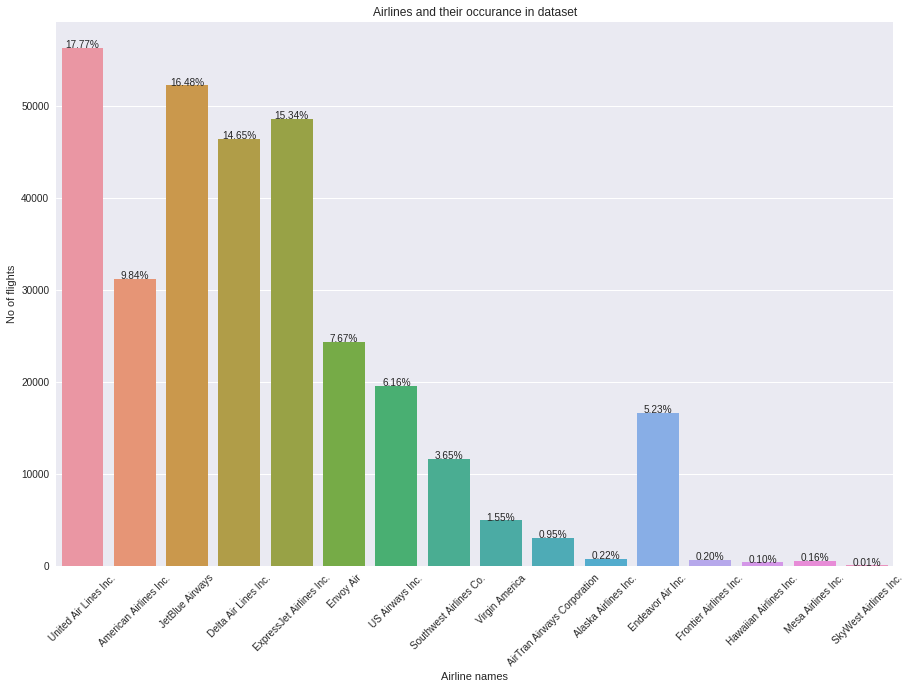

In [28]:
total = float(len(flights))
fig, ax = plt.subplots(figsize=(15,10));
sns.countplot(flights['name']);
plt.xticks(rotation=45);
plt.title("Airlines and their occurance in dataset");
plt.ylabel("No of flights");
plt.xlabel("Airline names");
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 4,
            '{0:.2%}'.format((height/total)),
            ha="center") 

Looks like United Airlines has the most number of flights in our dataset(17.77%), closely followed by JetBlue Airways(16.48%) 

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


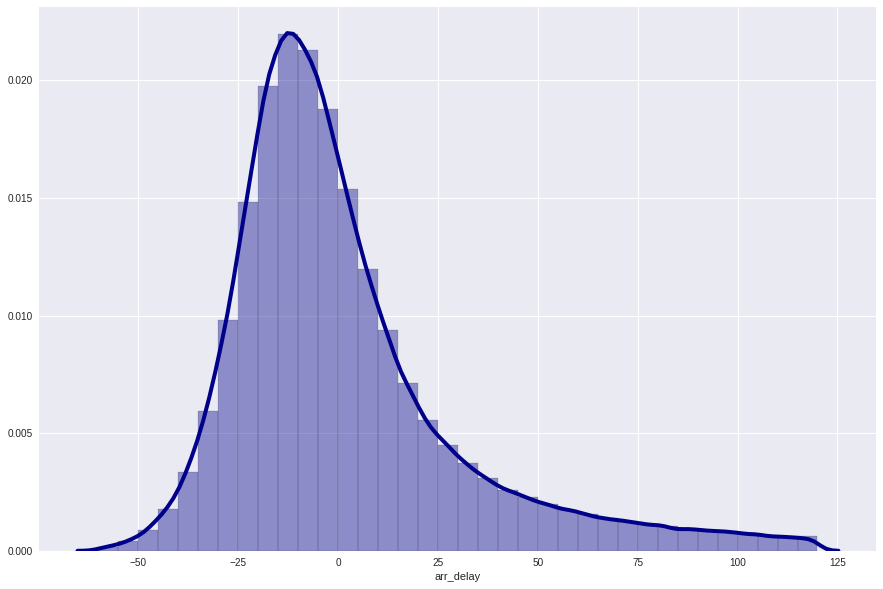

In [34]:
fig, ax = plt.subplots(figsize=(15,10));
# Density Plot and Histogram of all arrival delays
sns.distplot(flights['arr_delay'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

The histogram is slightly left skewed which means that more flights tend to arrive before scheduled arrival time. How am I never on these filghts?? 
For the first part of the assignment, we are looking for the airline that is most likely to get us to our destination on time. For the purpose of this analysis, I am going to consider the flights which have reached their destination before or on their scheduled arrival time. 

In [0]:
# Creating dataframe with on time / before time flights
on_time = flights.loc[flights['arr_delay'] <= 0]
#probability of being on time of each airlines
no_of_good_arrivals = on_time['name'].value_counts()
total_no_of_arrivals = flights['name'].value_counts()
prob_on_time = no_of_good_arrivals/total_no_of_arrivals

In [69]:
prob_on_time

AirTran Airways Corporation    0.423701
Alaska Airlines Inc.           0.741655
American Airlines Inc.         0.680162
Delta Air Lines Inc.           0.671365
Endeavor Air Inc.              0.642418
Envoy Air                      0.548526
ExpressJet Airlines Inc.       0.547295
Frontier Airlines Inc.         0.452269
Hawaiian Airlines Inc.         0.722892
JetBlue Airways                0.581992
Mesa Airlines Inc.             0.557505
SkyWest Airlines Inc.          0.703704
Southwest Airlines Co.         0.581636
US Airways Inc.                0.638410
United Air Lines Inc.          0.629891
Virgin America                 0.680691
Name: name, dtype: float64

We can see here that Alaska Airlines Inc. have the highest probability of being on time.

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


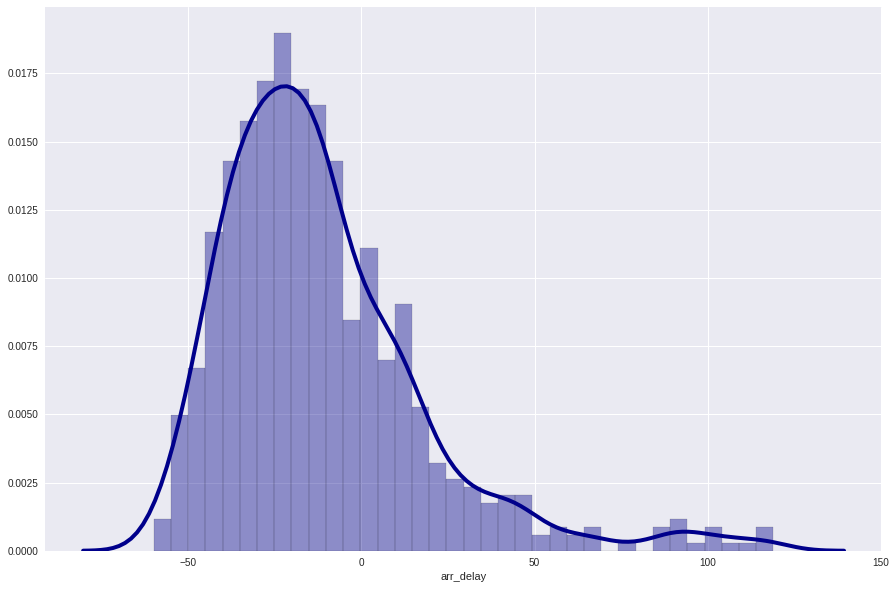

In [81]:
# Creating dataframe for Alaska Airlines Inc.
alaska = flights.loc[flights['name'] == 'Alaska Airlines Inc.']
fig, ax = plt.subplots(figsize=(15,10));
sns.distplot(alaska['arr_delay'], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4});

We can clearly see here that most of the flights from Alaska Airlines arrive before/on arrival time. In fact aboit 74% of them.  
### Hence Alaska Airlines Inc. would be my choice!!

## PART 2
1. Use the same airline data to demonstrate (or disprove) the four aspects of the Central Limit Theorem (from Central Limit Theorem video).
Hint: take repeated random samples of a specific size and measure the mean and standard deviation of each one.
2. Graph your results. Does it look like a normal distribution?
How does sample size affect your results?

CENTRAL LIMIT THEOREM (As per the video)
1. The sampling distribution of the mean will be less spread than the values in the population from which the sample is drawn.
2. The sampling distribution will be well-modeled by a normal distribution(and it will get closer with larger sample sizes)
3. The spread of the sampling distribution is related to the spread of the population values.
4. Bigger samples lead to a smaller spread in the sampling distribution. 

In [0]:
#creating function to generate plots
def sampling_dist_of_mean(sampling_times,sample_size):
  means=[]
  for x in range(sampling_times):
    #Taking the  sample from the flights dataframe
    sample = flights.sample(n=sample_size)
    means.append(sample['arr_delay'].describe()['mean'])
    s_d.append(sample['arr_delay'].describe()['std'])
  fig, ax = plt.subplots(figsize=(15,10));
  # Density Plot and Histogram of all arrival delays
  sns.distplot(means, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}); 
  print('Standard deviation of sampling distribution :', np.std(means))

## Sampling 2 rows 50 times

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Standard deviation of sampling distribution : 19.186880934638648


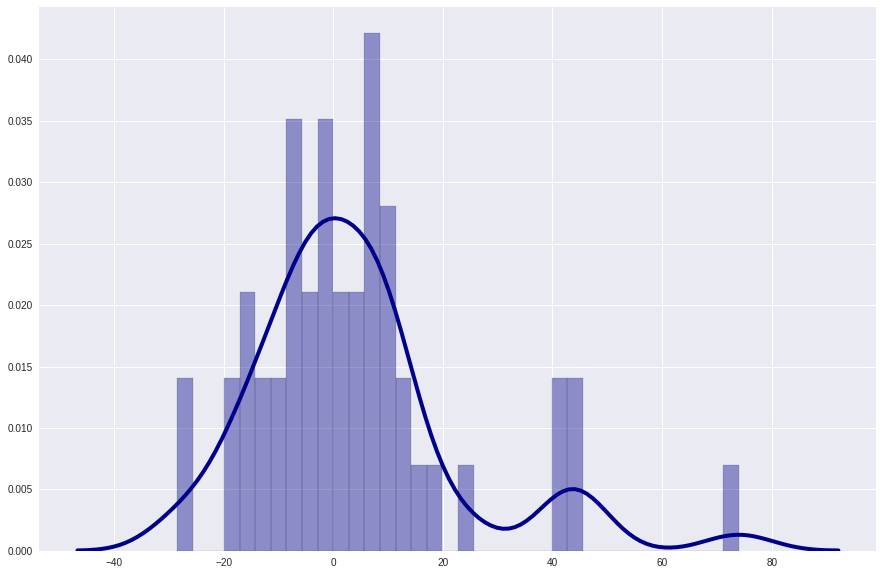

In [81]:
sampling_dist_of_mean(50,2)

1. The sampling distribution of the mean is less spread than the values in the population from which the sample is drawn.
2. The sampling distribution will be well-modeled by a normal distribution.
3. The spread of the sampling distribution is related to the spread of the population values.
Standard deviation of sampling distribution : 19.186880934638648 is very close to 29.064401 / 2^(1/2) = 20.55

## Sampling 5 rows 50 times

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Standard deviation of sampling distribution : 12.33084003626679


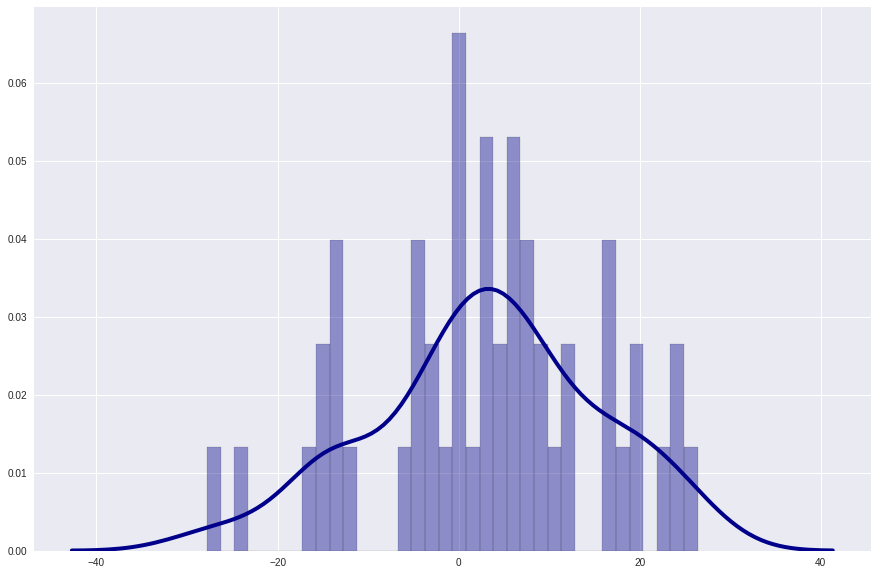

In [82]:
sampling_dist_of_mean(50,5)

1. The spread has decreased with the increase in sample size.
2. More like a normal distribution. 
3. The spread of the sampling distribution is related to the spread of the population values.
Standard deviation of sampling distribution : 12.33084003626679 is very close to 29.064401 / 5^(1/2) = 12.9979

## Sampling 10 rows 50 times

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Standard deviation of sampling distribution : 8.21676943816729


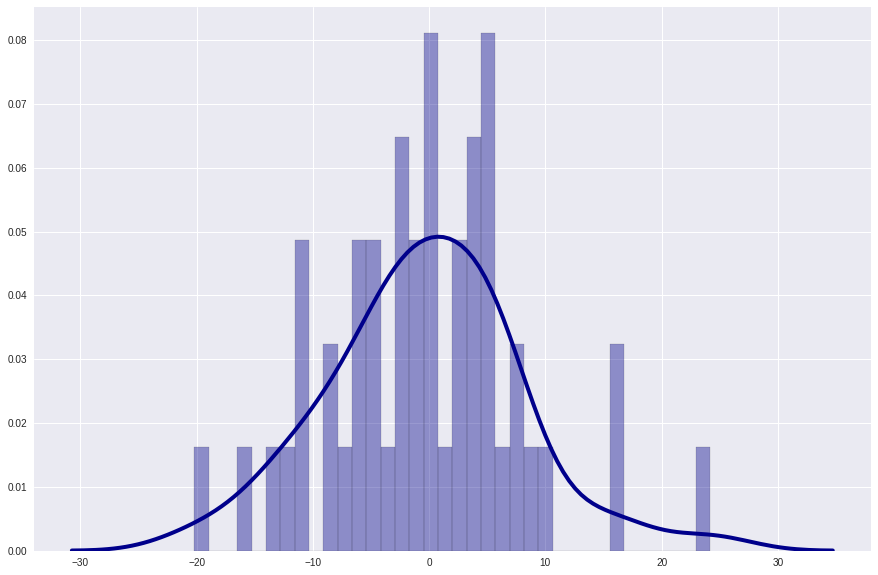

In [83]:
sampling_dist_of_mean(50,10)

1. Again the spread has decreased with the increase in sample size.
2. More like a normal distribution. 
3. The spread of the sampling distribution is related to the spread of the population values.
Standard deviation of sampling distribution : 8.21676943816729 is very close to 29.064401 / 10^(1/2) = 9.1909

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Standard deviation of sampling distribution : 2.044812727366494


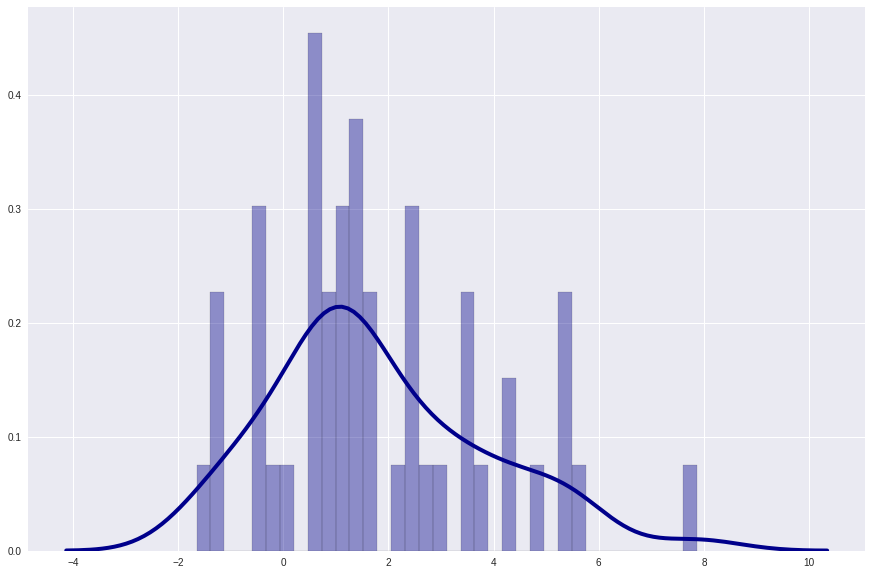

In [86]:
sampling_dist_of_mean(50,200)

Hence, we have proved the four aspects of the central limit theorem. 
## Credits
1. Data Lit [link](https://www.theschool.ai/courses/data-lit/)
2. “Histograms and Density Plots in Python” tutorial  [link](https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0)